In [1]:
library(tidyverse)
library(ggrepel)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(repr)

In [3]:
dat <- read.csv('atlas/atlas_adatas_june2021_final_obs.csv')

In [4]:
names(dat)

[1] "X"                "samplename"       "n_genes"          "n_molecules"     
 [5] "doublet_score"    "percent_mito"     "leiden"           "louvain"         
 [9] "diagnosis"        "phase"            "sample_diagnosis" "patient"         
[13] "treatment"        "procedure"        "hcl_refined"      "hcl_celltype"    
[17] "hcl_score"        "CLid"             "CL_name"          "nobatch_leiden"  
[21] "nobatch_louvain"  "cnv_avg"          "has_cnv"

Joining, by = "samplename"



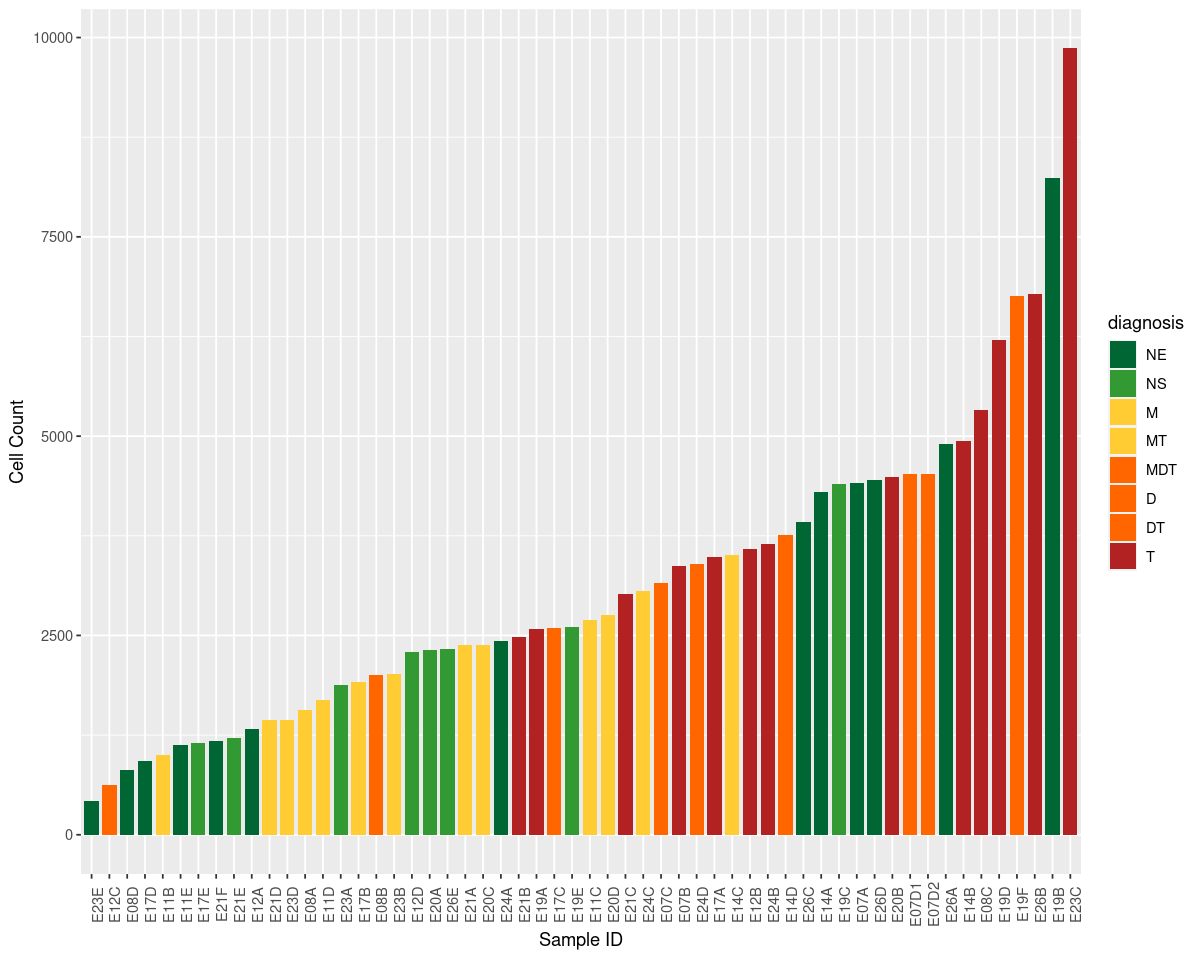

In [9]:

# How many cells per sample?

sample_name_table <- table(dat$samplename)

sample_name_df <- data.frame(sample_name_table)
colnames(sample_name_df) <- c('samplename', 'cellcount')

sample_name_df <- dplyr::inner_join(sample_name_df, unique(dat[,c('samplename', 'diagnosis')]))

options(repr.plot.width=10, repr.plot.height=8)
ggplot(data = sample_name_df) +
    geom_bar(mapping = aes(x=reorder(samplename, cellcount), y=cellcount, fill=diagnosis), stat="identity", width=0.8) +
    theme(axis.text.x = element_text(angle = 90)) + 
    xlab('Sample ID') + ylab('Cell Count') +
    scale_fill_manual(values = c("NE" = "#006633",
                                  "NS" = "#339933",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "T"  = "#B22222")) 


In [195]:

# how many samples are there?

length(sample_name_table)


[1] 56

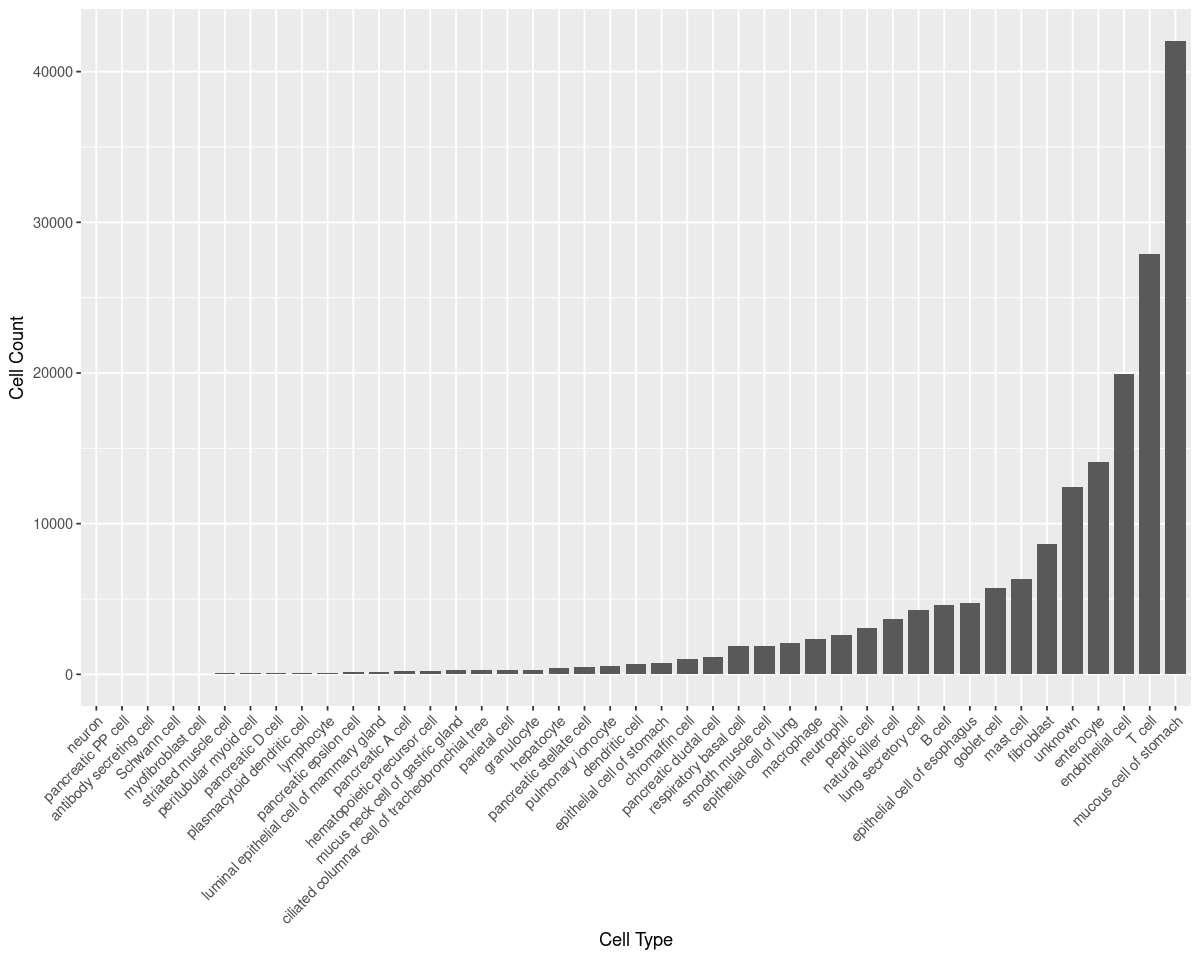

In [196]:


cell_type_table <- table(dat$CL_name)

cell_type_df <- data.frame(cell_type_table)
colnames(cell_type_df) <- c('celltype', 'cellcount')

options(repr.plot.width=10, repr.plot.height=8)
ggplot(data = cell_type_df) +
    geom_bar(mapping = aes(x=reorder(celltype, cellcount), y=cellcount), stat="identity", width=0.8) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1.0)) + 
    xlab('Cell Type') + ylab('Cell Count') 


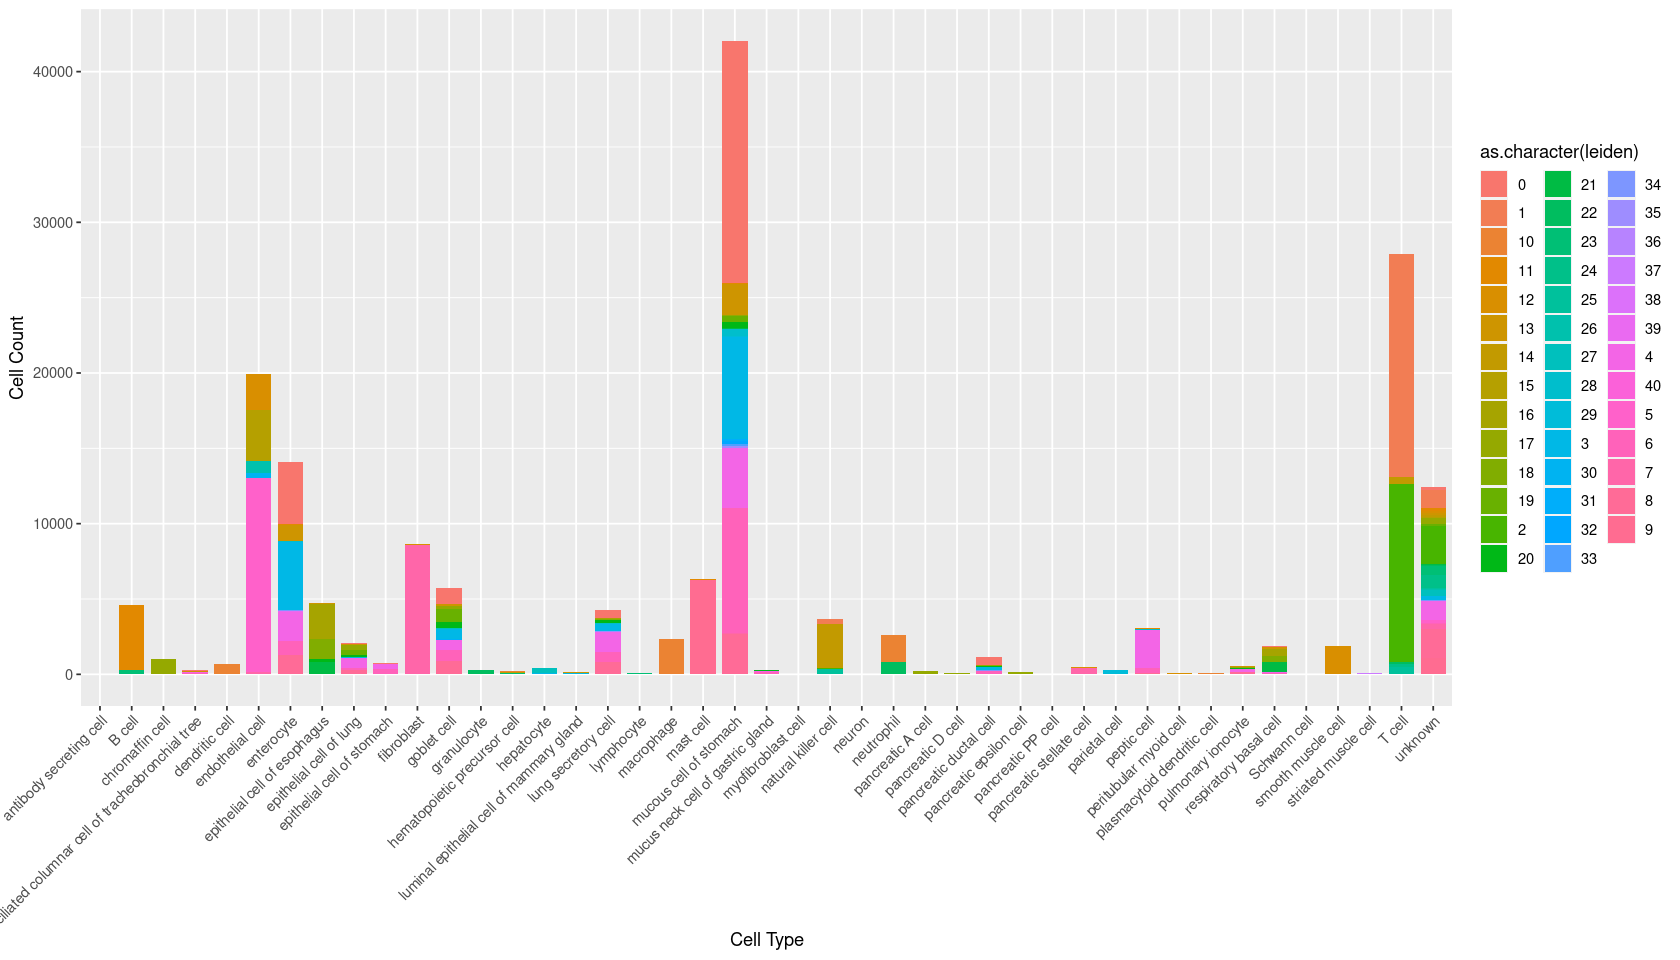

In [197]:



options(repr.plot.width=14, repr.plot.height=8)
ggplot(data = dat) +
    geom_bar(mapping = aes(x=CL_name, fill=as.character(leiden)),  width=0.8) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1.0)) + 
    xlab('Cell Type') + ylab('Cell Count') 


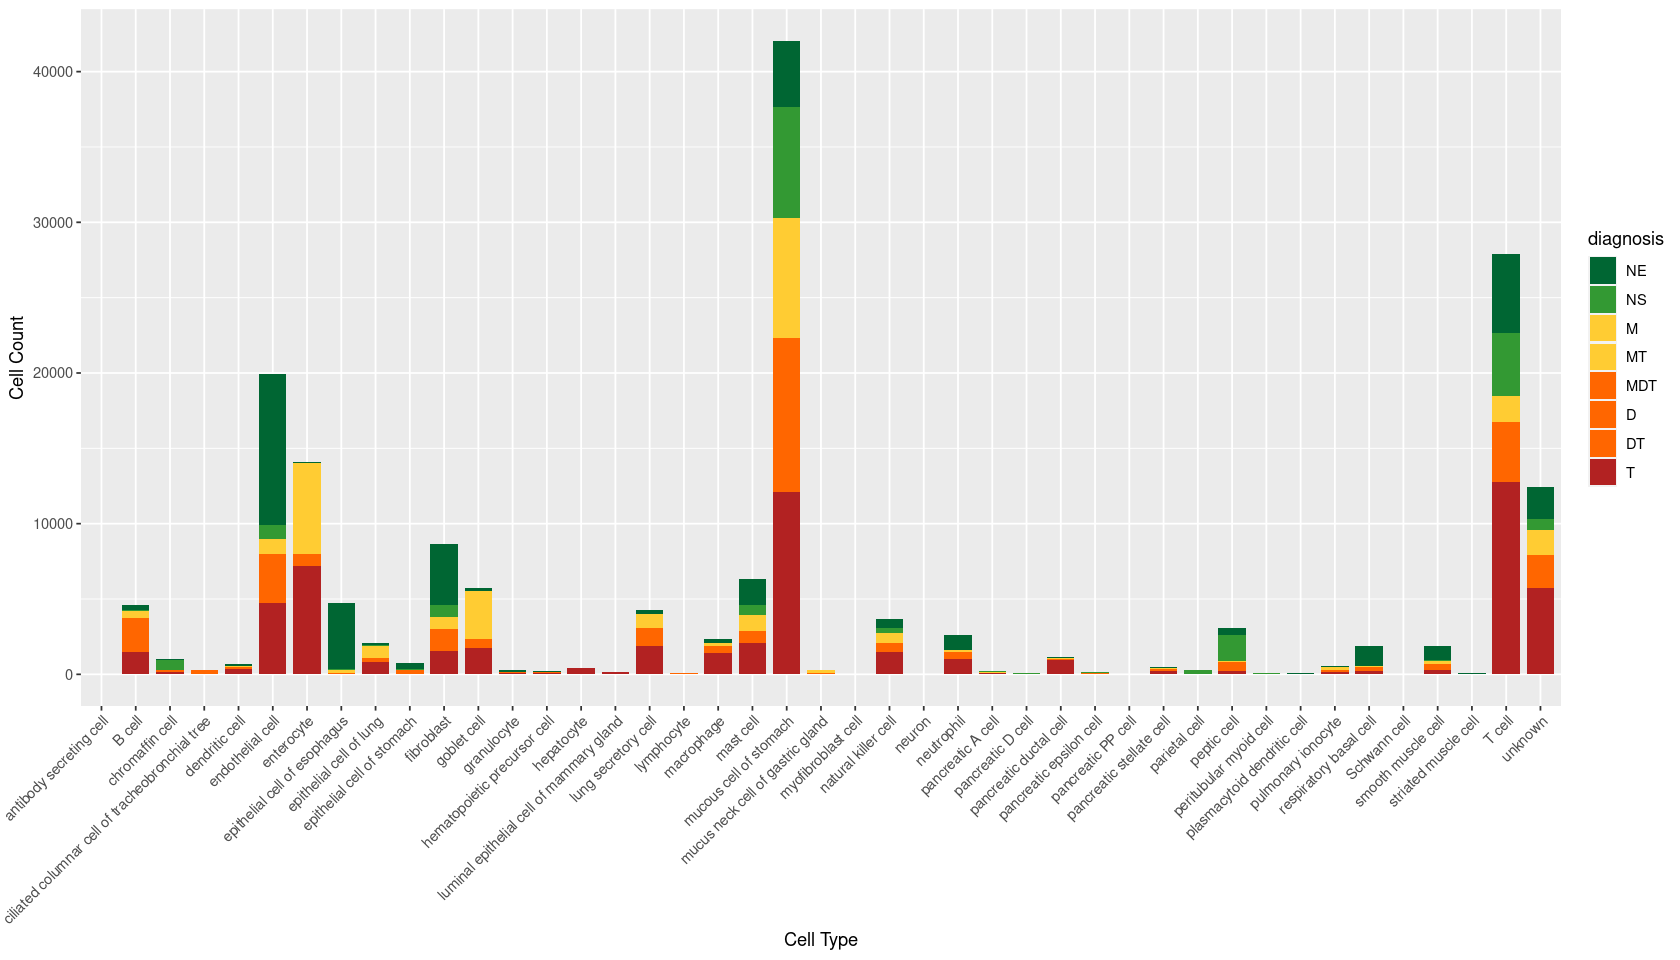

In [6]:

options(repr.plot.width=14, repr.plot.height=8)
dat$diagnosis <- factor(dat$diagnosis, levels = c('NE','NS','M','MT','MDT','D','DT','T'))
ggplot(data = dat) +
    geom_bar(mapping = aes(x=CL_name, fill=diagnosis),  width=0.8) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1.0)) + 
    xlab('Cell Type') + ylab('Cell Count') +
    scale_fill_manual(values = c("NE" = "#006633",
                                  "NS" = "#339933",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "T"  = "#B22222")) 


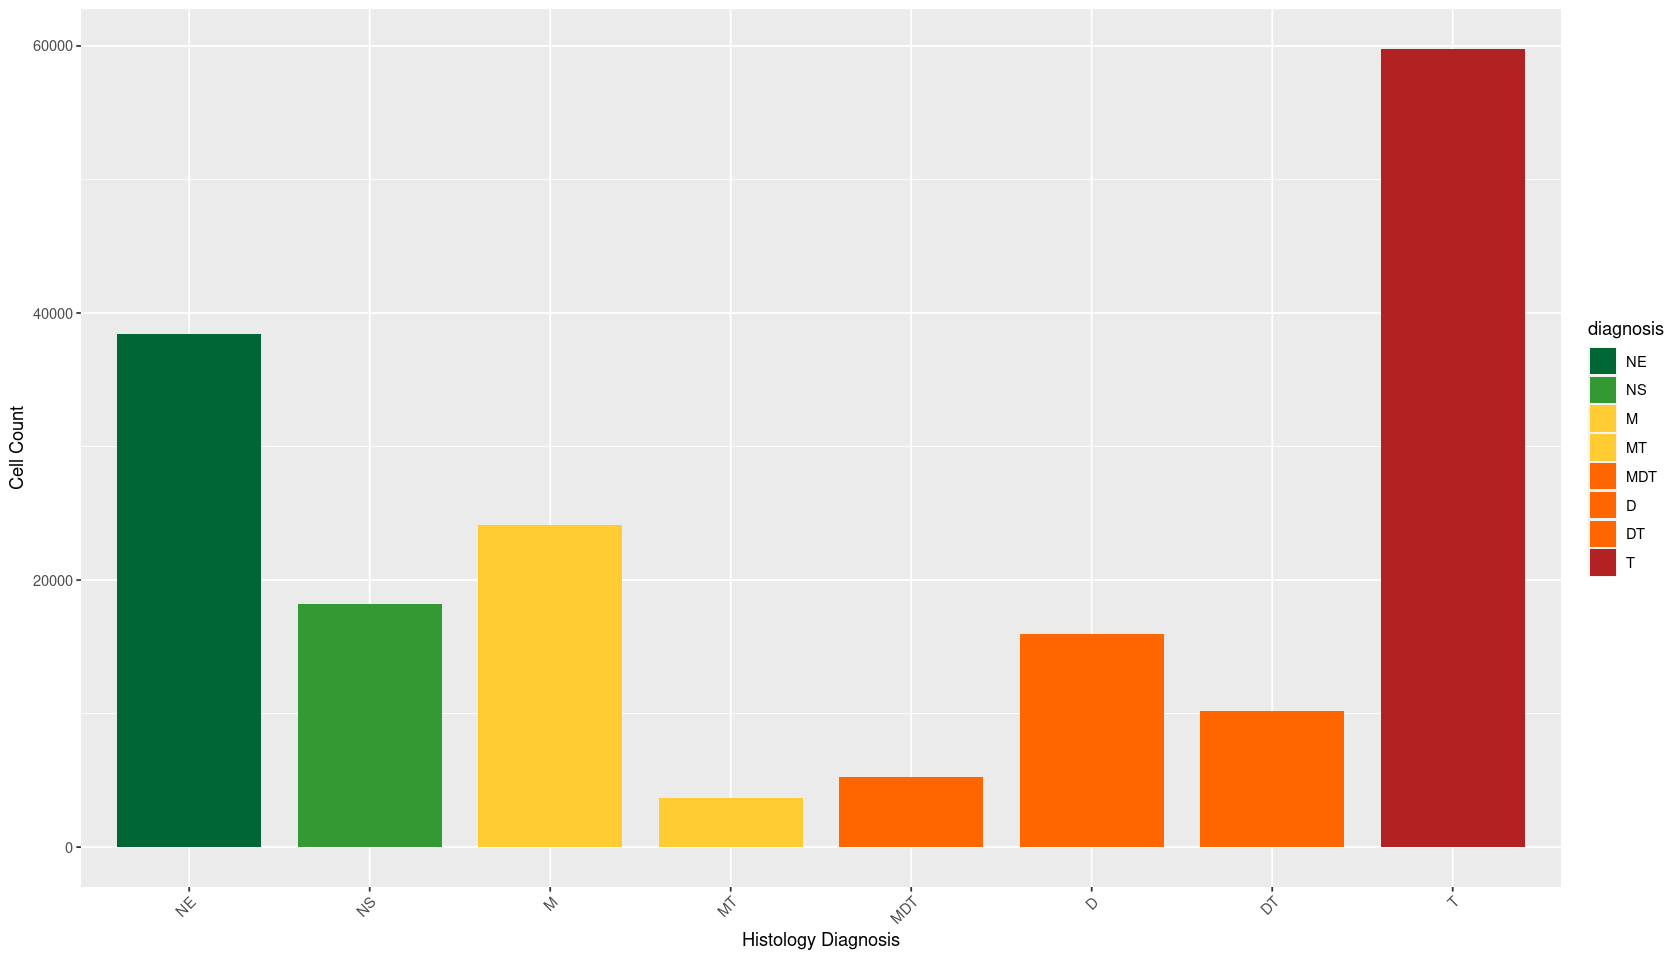

In [7]:

options(repr.plot.width=14, repr.plot.height=8)
dat$diagnosis <- factor(dat$diagnosis, levels = c('NE','NS','M','MT','MDT','D','DT','T'))
ggplot(data = dat) +
    geom_bar(mapping = aes(x=diagnosis, fill=diagnosis),  width=0.8) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1.0)) + 
    xlab('Histology Diagnosis') + ylab('Cell Count') +
    scale_fill_manual(values = c("NE" = "#006633",
                                  "NS" = "#339933",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "T"  = "#B22222")) 

<ggproto object: Class ScaleDiscrete, Scale, gg>
    aesthetics: fill
    axis_order: function
    break_info: function
    break_positions: function
    breaks: waiver
    call: call
    clone: function
    dimension: function
    drop: TRUE
    expand: waiver
    get_breaks: function
    get_breaks_minor: function
    get_labels: function
    get_limits: function
    guide: legend
    is_discrete: function
    is_empty: function
    labels: waiver
    limits: NE NS M MT MDT DT D T
    make_sec_title: function
    make_title: function
    map: function
    map_df: function
    n.breaks.cache: NULL
    na.translate: TRUE
    na.value: grey50
    name: waiver
    palette: function
    palette.cache: NULL
    position: left
    range: <ggproto object: Class RangeDiscrete, Range, gg>
        range: NULL
        reset: function
        train: function
        super:  <ggproto object: Class RangeDiscrete, Range, gg>
    rescale: function
    reset: function
    scale_name: manual
    train:

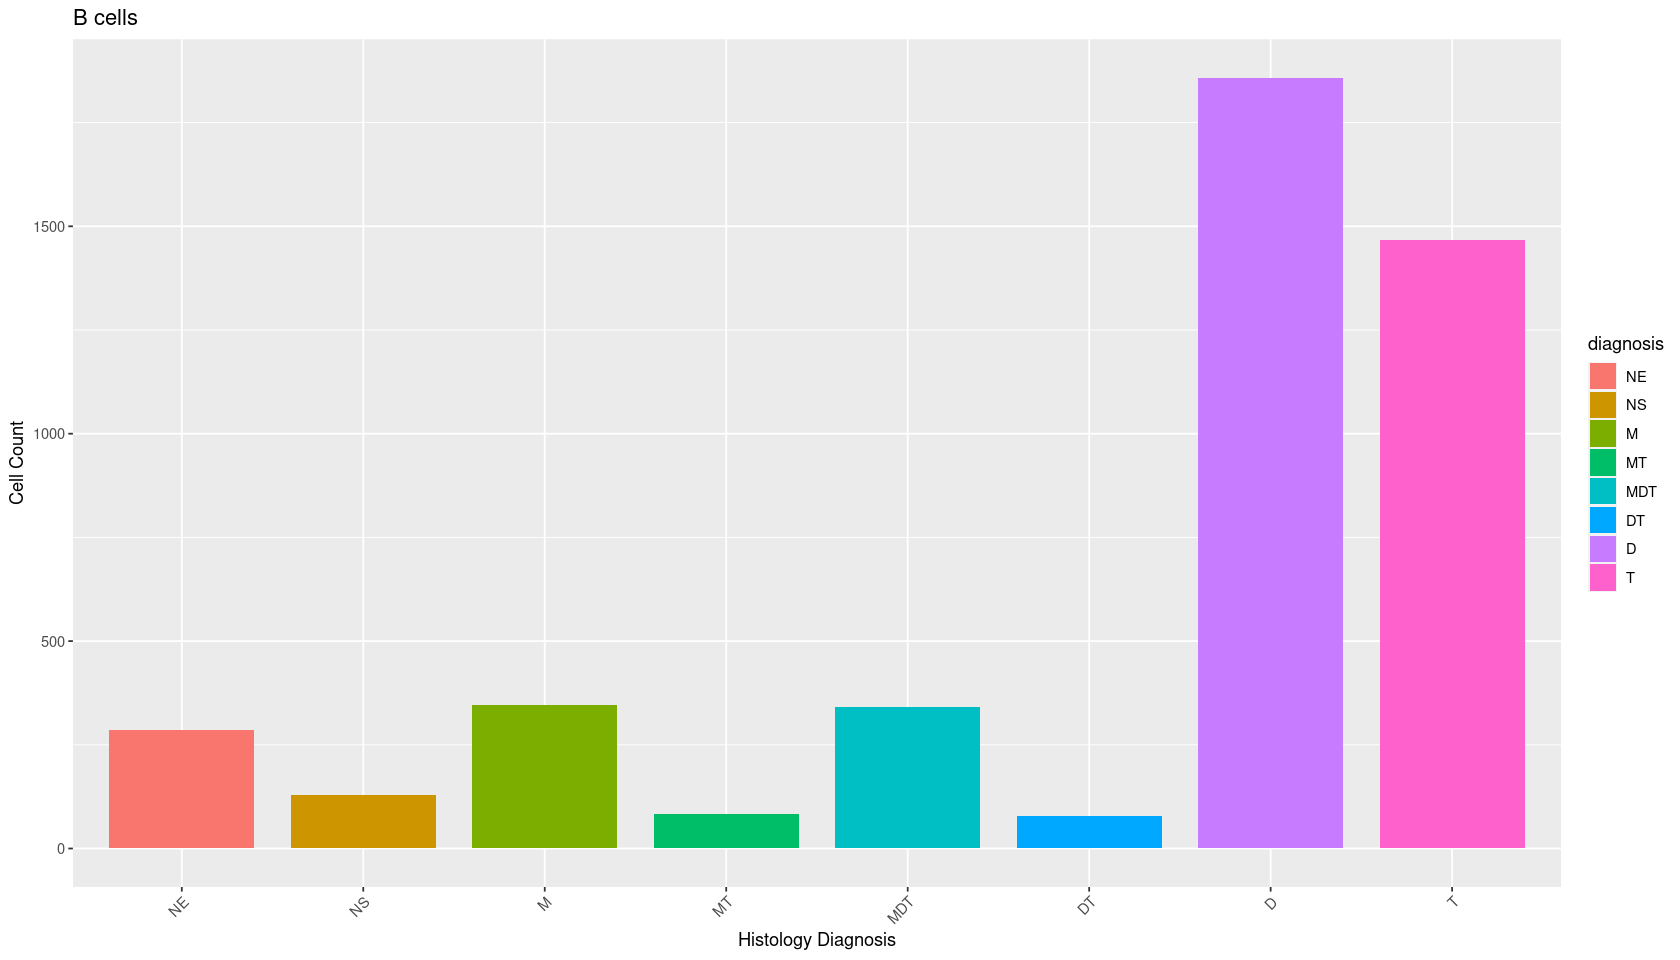

In [200]:

options(repr.plot.width=14, repr.plot.height=8)
dat$diagnosis <- factor(dat$diagnosis, levels = c('NE','NS','M','MT','MDT','DT','D','T'))
ggplot(data = dat %>% dplyr::filter(CL_name == 'B cell')) +
    geom_bar(mapping = aes(x=diagnosis, fill=diagnosis),  width=0.8) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1.0)) + 
    xlab('Histology Diagnosis') + ylab('Cell Count') + labs(title='B cells')
    scale_fill_manual(values = c("NE" = "#006633",
                                  "NS" = "#339933",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 



In [22]:
table(dat[,'diagnosis'])


   NE    NS     M    MT   MDT     D    DT     T 
38447 18199 24128  3691  5223 15972 10157 59769 

In [31]:
dat$diagnosis <- factor(dat$diagnosis, levels = c('NE','NS','M','MT','MDT','D','DT','T'))
cellcnts <- data.frame(table(dat[,c('diagnosis','CL_name')]))
head(cellcnts)
normCellCnts <- cellcnts %>% group_by(CL_name) %>% mutate(freqSum = sum(Freq)) %>% mutate(percentOfDx= 100* (Freq / freqSum) )

,diagnosis,CL_name,Freq
,<fct>,<fct>,<int>
1,NE,antibody secreting cell,12
2,NS,antibody secreting cell,0
3,M,antibody secreting cell,0
4,MT,antibody secreting cell,11
5,MDT,antibody secreting cell,0
6,D,antibody secreting cell,1


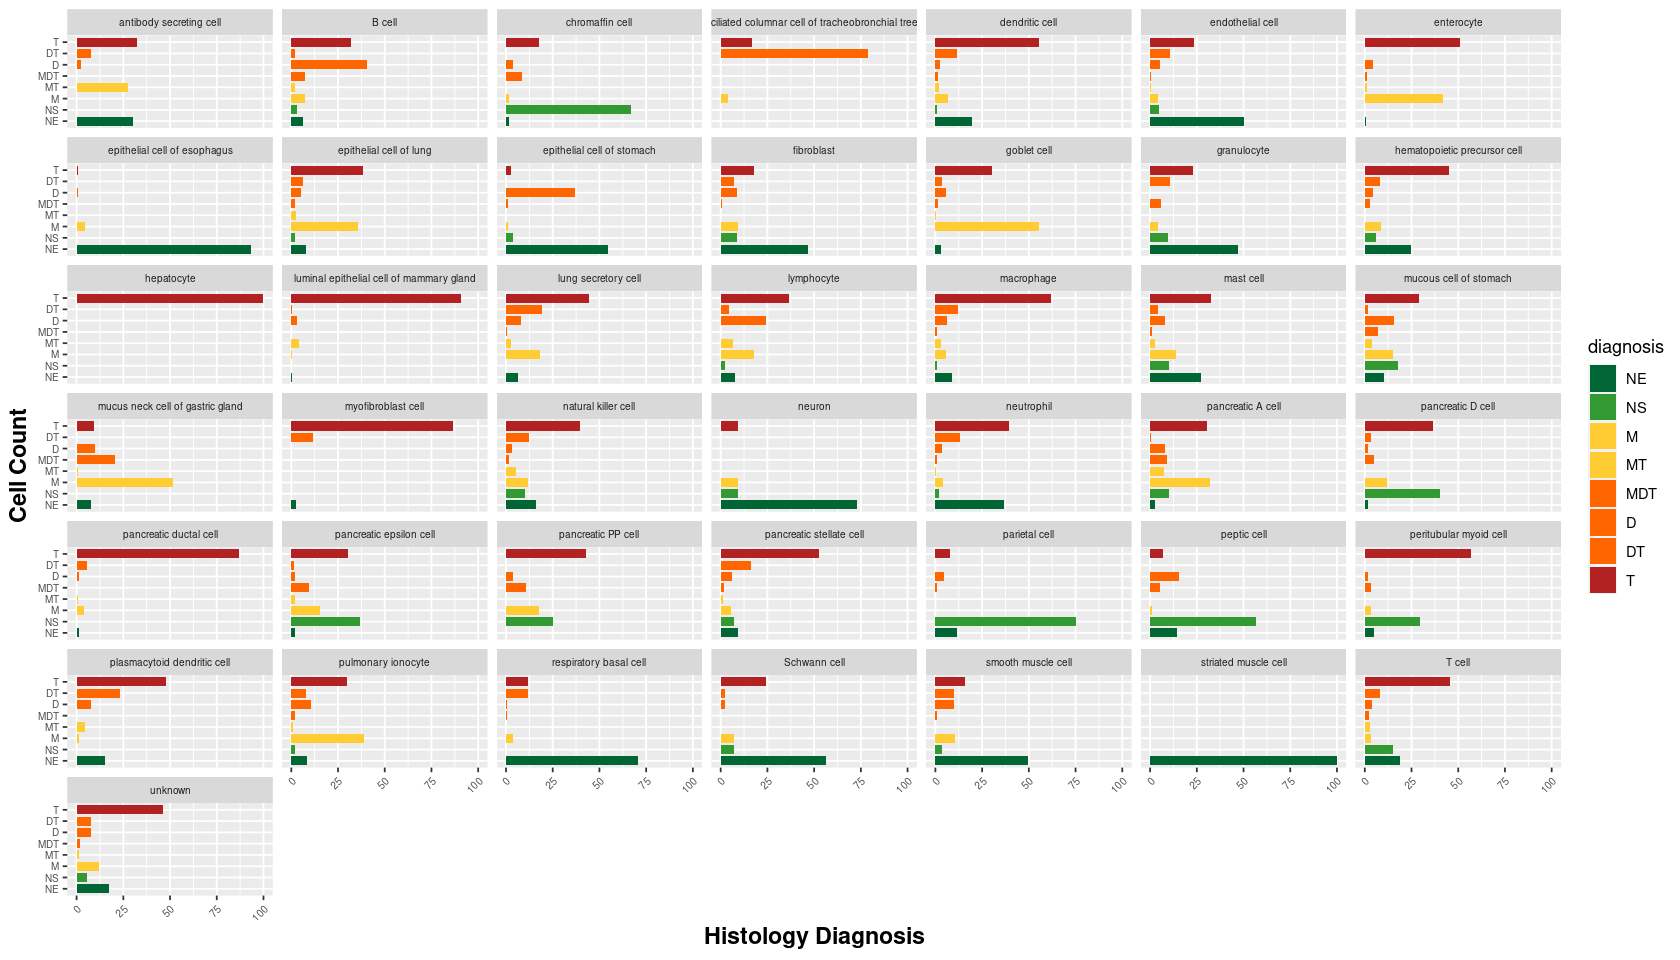

In [39]:

options(repr.plot.width=14, repr.plot.height=8)
dat$diagnosis <- factor(dat$diagnosis, levels = c('NE','NS','M','MT','MDT','D','DT','T'))
ggplot(data = normCellCnts) +
    geom_bar(mapping = aes(x=percentOfDx, y=diagnosis, fill=diagnosis),  width=0.8, stat="identity") +
    scale_fill_manual(values = c("NE" = "#006633",
                                  "NS" = "#339933",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "T"  = "#B22222")) +
    facet_wrap(~CL_name) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1.0)) + 
    xlab('Histology Diagnosis') + ylab('Cell Count') +
    theme(axis.text=element_text(size=6),
          axis.title=element_text(size=14,face="bold"),
         strip.text.x = element_text(size = 6))
      



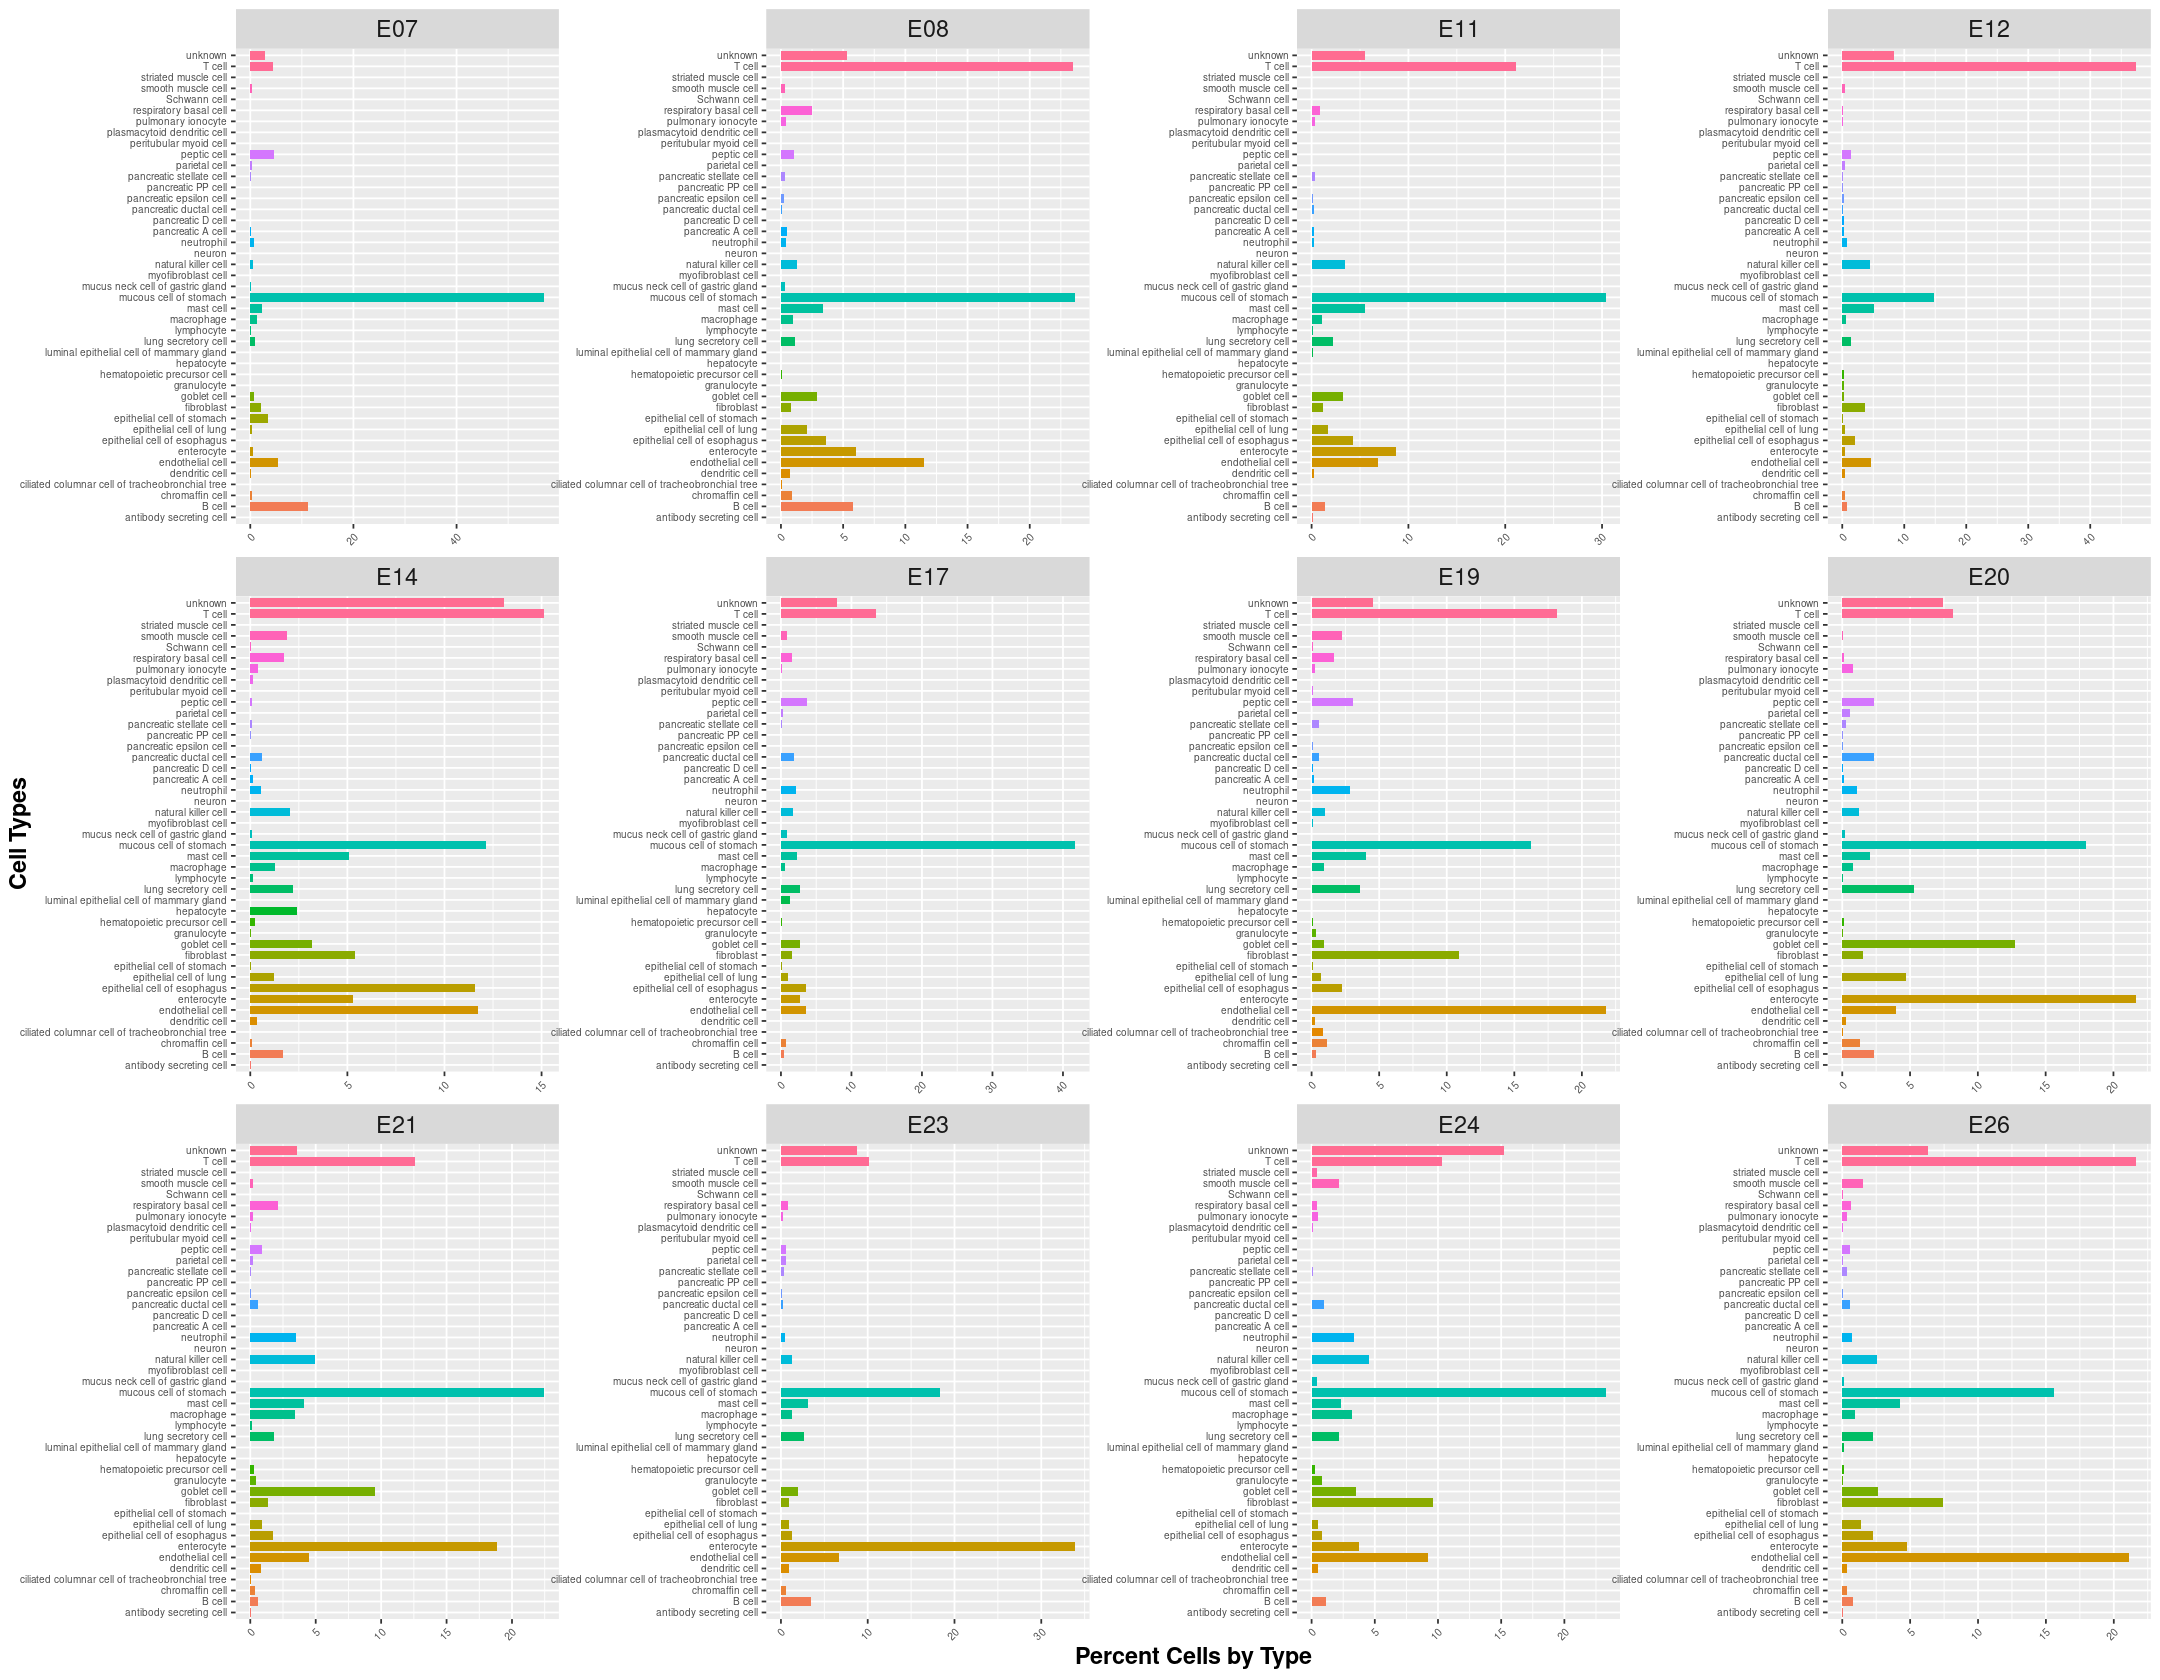

In [58]:
options(repr.plot.width=18, repr.plot.height=14)

cellcnts <- data.frame(table(dat[,c('patient','CL_name')]))
normCellCntsByPatient <- cellcnts %>% group_by(patient) %>% mutate(freqSum = sum(Freq)) %>% mutate( percentOfPatient= 100* (Freq / freqSum) )
head(normCellCntsByPatient)

ggplot(data = normCellCntsByPatient) +
    geom_bar(mapping = aes(x=percentOfPatient, y=CL_name, fill=CL_name),  width=0.8, stat="identity") +
    facet_wrap(~patient,scales = "free") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1.0)) + 
    xlab('Percent Cells by Type') + ylab('Cell Types') +
    theme(axis.text=element_text(size=6),
          axis.title=element_text(size=14,face="bold"),
          strip.text.x = element_text(size = 14),
          legend.position="none")
      


patient,CL_name,Freq,freqSum,percentOfPatient
<fct>,<fct>,<int>,<int>,<dbl>
E07,antibody secreting cell,0,3371,0.00000000
E08,antibody secreting cell,1,5322,0.01878993
E12,antibody secreting cell,0,3590,0.00000000
E14,antibody secreting cell,2,4945,0.04044489
E17,antibody secreting cell,0,3478,0.00000000
E19,antibody secreting cell,0,8778,0.00000000


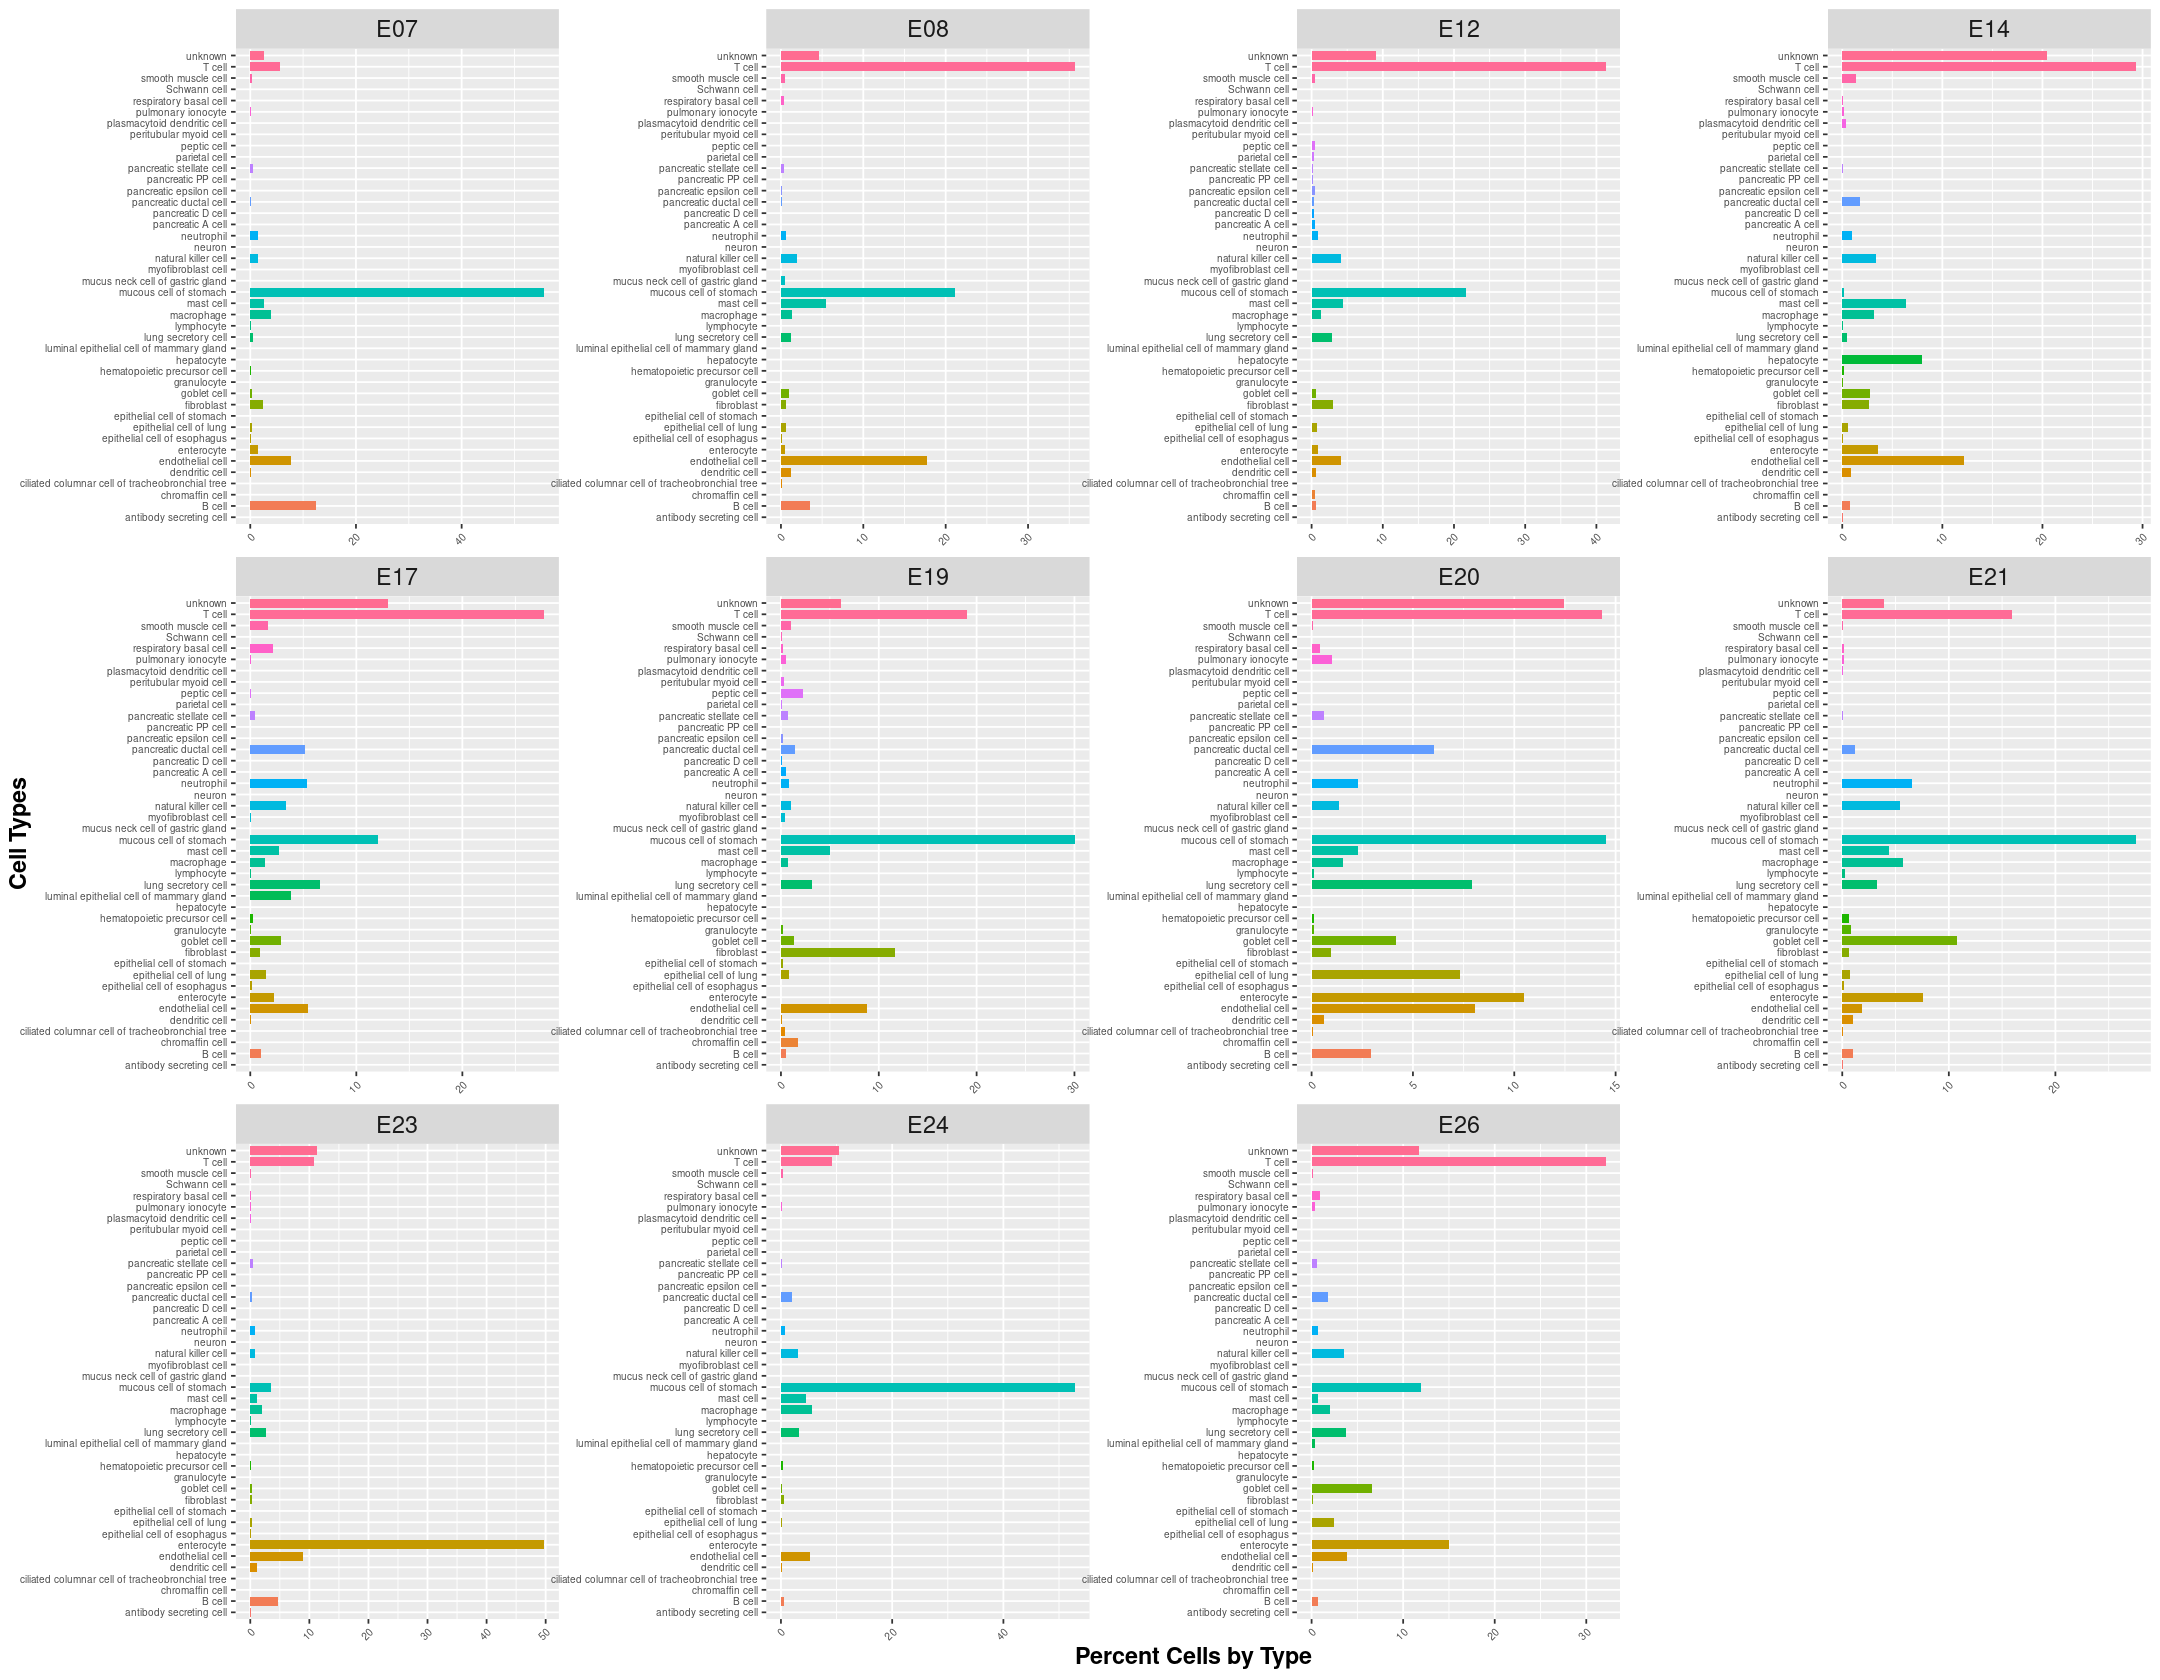

In [64]:

options(repr.plot.width=18, repr.plot.height=14)

subDat <- dat %>% dplyr::filter( (diagnosis == 'T'))

cellcnts <- data.frame(table(subDat[,c('patient','CL_name')]))
normCellCntsByPatient <- cellcnts %>% group_by(patient) %>% mutate(freqSum = sum(Freq)) %>% mutate( percentOfPatient= 100* (Freq / freqSum) )
head(normCellCntsByPatient)

ggplot(data = normCellCntsByPatient) +
    geom_bar(mapping = aes(x=percentOfPatient, y=CL_name, fill=CL_name),  width=0.8, stat="identity") +
    facet_wrap(~patient,scales = "free") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1.0)) + 
    xlab('Percent Cells by Type') + ylab('Cell Types') +
    theme(axis.text=element_text(size=6),
          axis.title=element_text(size=14,face="bold"),
          strip.text.x = element_text(size = 14),
          legend.position="none")
      


In [66]:
normCellCntsByPatient %>% group_by(patient) %>% summarise(sum(percentOfPatient))

patient,sum(percentOfPatient)
<fct>,<dbl>
E07,100
E08,100
E12,100
E14,100
E17,100
E19,100
E20,100
E21,100
E23,100


In [134]:
library(tidyr)


subDat <- dat #%>% dplyr::filter( (diagnosis == 'NE'))

cellcnts <- data.frame(table(subDat[,c('patient','CL_name')]))
normCellCntsByPatient <- cellcnts %>% group_by(patient) %>% mutate(freqSum = sum(Freq)) %>% mutate( percentOfPatient= 100* (Freq / freqSum) )

dx <- normCellCntsByPatient %>% select(patient, CL_name, percentOfPatient) 
cellPercTable <- pivot_wider(dx, names_from = patient, values_from = percentOfPatient)
cellPercMatrix <- as.matrix(cellPercTable[, -1])
rownames(cellPercMatrix) <- as.character(cellPercTable[,'CL_name'] %>% pull())


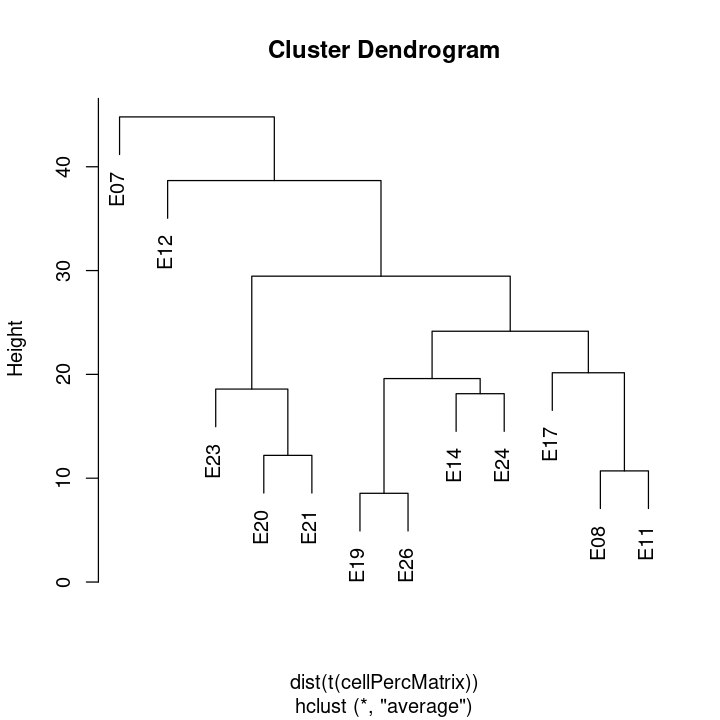

In [135]:
options(repr.plot.width=6, repr.plot.height=6)
plot(hclust(dist(t(cellPercMatrix)), method="average"))
#plot(mydata.hclust,labels=mydata$Company,main='Default from hclust')
#plot(mydata.hclust,hang=-1, labels=mydata$Company,main='Default from hclust')


In [136]:
kc<-kmeans((cellPercMatrix),3)
kc

K-means clustering with 3 clusters of sizes 38, 1, 4

Cluster means:
         E07        E08       E11        E12       E14        E17       E19
1  0.7847737  0.7929745  0.719247  0.6422746  1.123017  0.8045658  1.035486
2 56.9913452 23.6258637 30.357966 14.7689558 12.114057 41.6857171 16.236318
3  3.2968132 11.5602764 10.577662 15.2061527 11.302821  6.9351953 11.103803
        E20       E21        E23       E24        E26
1  1.074091  1.001917  0.5834479  1.004976  0.8039303
2 17.975553 22.460670 18.2731695 23.254886 15.6007146
3 10.302244  9.866621 14.8889529  9.639011 13.4624833

Clustering vector:
                        antibody secreting cell 
                                              1 
                                         B cell 
                                              1 
                                chromaffin cell 
                                              1 
ciliated columnar cell of tracheobronchial tree 
                                              1 

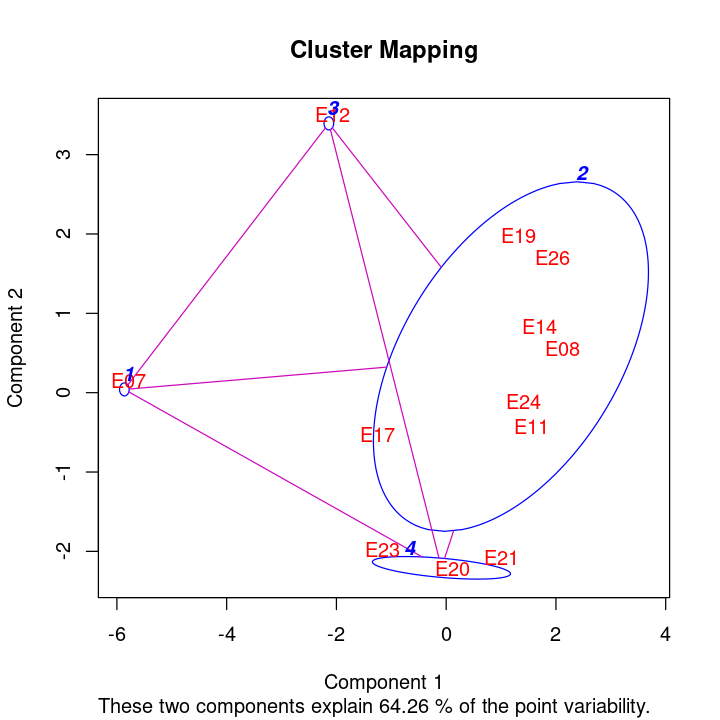

In [143]:
library(cluster)
pamvshortset <- pam( dist(t(cellPercMatrix)), 4, diss = FALSE)
clusplot(pamvshortset, shade = FALSE, labels=2, col.clus="blue", col.p="red", span=FALSE, main="Cluster Mapping", cex=0)

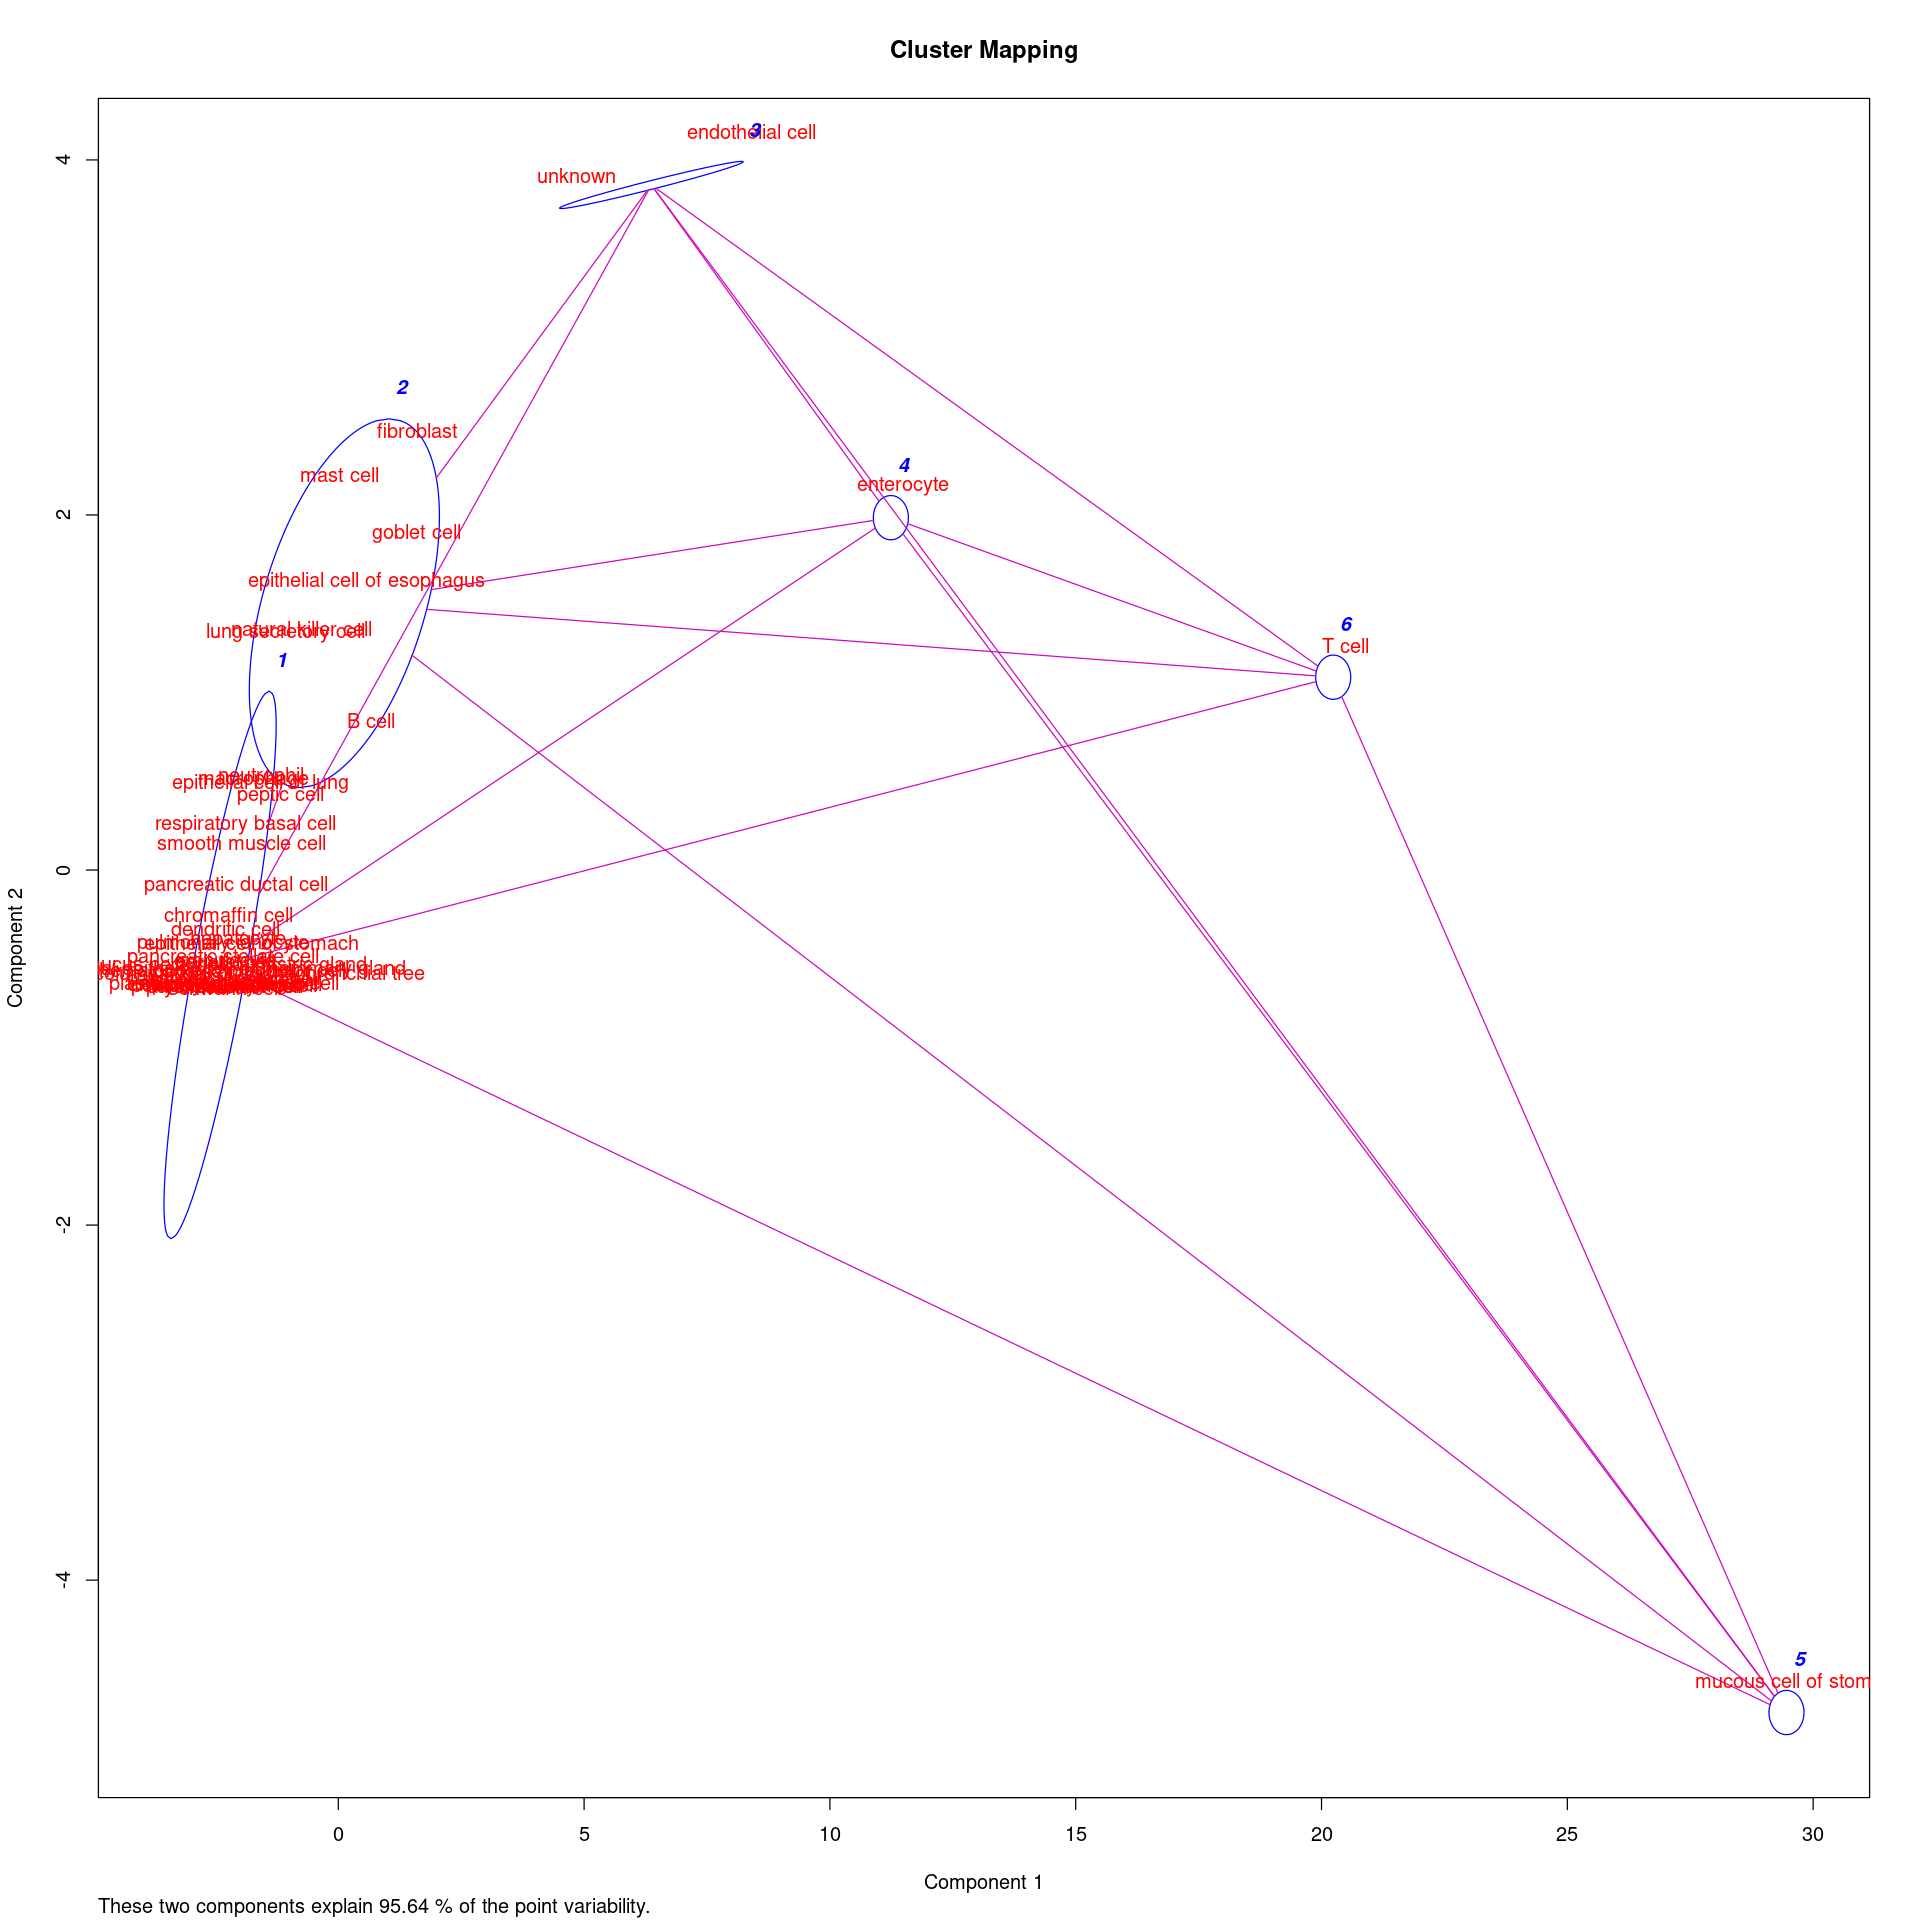

In [146]:
options(repr.plot.width=16, repr.plot.height=16)
pamvshortset <- pam( dist((cellPercMatrix)), 6, diss = FALSE)
clusplot(pamvshortset, shade = FALSE, labels=2, col.clus="blue", col.p="red", span=FALSE, main="Cluster Mapping", cex=0)